Visualtization

In [1]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

In [2]:
sql = '''select * from "DAP_Project"."Electric_Vehicles".ev_registration_fin'''
try:
    dbConnection = psycopg2.connect(
        user = "airflow",
        password = "airflow",
        host = "localhost",
        port = "5432",
        database = "DAP_Project"
    )
    ev_reg_df = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
sql = '''select * from "DAP_Project"."Electric_Vehicles".ev_population_fin'''
try:
    dbConnection = psycopg2.connect(
        user = "airflow",
        password = "airflow",
        host = "localhost",
        port = "5432",
        database = "DAP_Project"
    )
    ev_pop_df = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
ev_reg_df.head()

,vin,clean_alternative_fuel_vehicle_type,dol_vehicle_id,model_year,make,model,vehicle_primary_use,electric_range,odometer_reading,odometer_code,...,meets_2019_hb_2042_electric_range_requirement,meets_2019_hb_2042_sale_date_requirement,meets_2019_hb_2042_sale_price_value_requirement,hb_2042_battery_range_requirement,hb_2042_purchase_date_requirement,hb_2042_sale_price_value_requirement,electric_vehicle_fee_paid,transportation_electrification_fee_paid,hybrid_vehicle_electrification_fee_paid,electric_utility
0,WBY1Z6C30H,Battery Electric Vehicle (BEV),210019722,2017,BMW,i3,Passenger,81,0,Odometer reading is not collected at time of r...,...,True,False,False,Meets battery range requirement,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,No,No,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,5YJ3E1EB8J,Battery Electric Vehicle (BEV),475536239,2018,TESLA,Model 3,Passenger,215,0,Odometer reading is not collected at time of r...,...,True,False,False,Meets battery range requirement,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,5YJXCDE24H,Battery Electric Vehicle (BEV),329473777,2017,TESLA,Model X,Passenger,200,0,Odometer reading is not collected at time of r...,...,True,False,False,Meets battery range requirement,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,1G1FZ6S03L,Battery Electric Vehicle (BEV),8448772,2020,CHEVROLET,Bolt EV,Passenger,259,29,Actual Mileage,...,True,True,True,Meets battery range requirement,Meets purchase date requirement,Meets title transaction requirement,Not Applicable,Not Applicable,Not Applicable,PUGET SOUND ENERGY INC
4,5YJYGDEE7M,Battery Electric Vehicle (BEV),142393177,2021,TESLA,Model Y,Passenger,0,15,Actual Mileage,...,False,True,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [5]:
ev_reg_df.describe()

,model_year,electric_range,odometer_reading,sale_price,base_msrp,transaction_year
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2017.270800,107.914000,2688.573000,10116.281970,4791.813000,2019.538000
std,3.276464,96.781355,10853.807922,23064.576424,17571.912179,2.609045
min,2000.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,2015.000000,19.000000,0.000000,0.000000,0.000000,2018.000000
50%,2017.000000,76.000000,0.000000,0.000000,0.000000,2020.000000
75%,2020.000000,210.000000,15.000000,0.000000,0.000000,2022.000000
max,2023.000000,337.000000,128025.000000,169250.000000,110950.000000,2023.000000


In [6]:
ev_pop_df.describe()

,base_msrp,eligibility_status,electric_range,model_year
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,1657.436000,0.482000,80.274400,2019.378600
std,10180.745984,0.499726,100.473063,3.026003
min,0.000000,0.000000,0.000000,2000.000000
25%,0.000000,0.000000,0.000000,2018.000000
50%,0.000000,0.000000,25.000000,2020.000000
75%,0.000000,1.000000,200.000000,2022.000000
max,110950.000000,1.000000,337.000000,2023.000000


In [7]:
print(ev_pop_df.columns.tolist())

['vin', 'census_tract', 'base_msrp', 'city', 'clean_alternative_fuel_vehicle_eligibility', 'eligibility_status', 'counties', 'county', 'dol_vehicle_id', 'electric_range', 'electric_utility', 'electric_vehicle_type', 'make', 'model', 'model_year', 'postal_code', 'state']


In [8]:
ev_pop_df.head()

,vin,census_tract,base_msrp,city,clean_alternative_fuel_vehicle_eligibility,eligibility_status,counties,county,dol_vehicle_id,electric_range,electric_utility,electric_vehicle_type,make,model,model_year,postal_code,state
0,5UXTA6C05M,53063010604,0.0,Spokane,Clean Alternative Fuel Vehicle Eligible,1,3214,Spokane,179148924,30.0,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,Plug-in Hybrid Electric Vehicle (PHEV),BMW,X5,2021,99208,WA
1,5YJ3E1EA6P,53033012100,0.0,Seattle,Eligibility unknown as battery range has not b...,0,3009,King,227496587,0.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),TESLA,MODEL 3,2023,98146,WA
2,1N4AZ1CP5J,53033022501,0.0,Kirkland,Clean Alternative Fuel Vehicle Eligible,1,3009,King,248988274,151.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),NISSAN,LEAF,2018,98033,WA
3,5YJ3E1EB5K,53033009400,0.0,Seattle,Clean Alternative Fuel Vehicle Eligible,1,3009,King,100964153,220.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),TESLA,MODEL 3,2019,98144,WA
4,1G1RB6E41D,53075000300,0.0,Pullman,Clean Alternative Fuel Vehicle Eligible,1,2745,Whitman,132511417,38.0,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,Plug-in Hybrid Electric Vehicle (PHEV),CHEVROLET,VOLT,2013,99163,WA


In [9]:
grouped = ev_pop_df.groupby('make').count()

In [10]:
import os
os.getcwd()

'C:\\Users\\Admin\\Desktop\\DA_Project\\DAP'

In [11]:
grouped

,vin,census_tract,base_msrp,city,clean_alternative_fuel_vehicle_eligibility,eligibility_status,counties,county,dol_vehicle_id,electric_range,electric_utility,electric_vehicle_type,model,model_year,postal_code,state
make,,,,,,,,,,,,,,,,
AUDI,91,91,91,91,91,91,90,91,91,91,91,91,91,91,91,91
BMW,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220
CADILLAC,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
CHEVROLET,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420
CHRYSLER,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
FIAT,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
FISKER,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FORD,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223
GENESIS,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [12]:
grouped.to_csv("grouped.csv")

In [13]:
import os
os.getcwd()

'C:\\Users\\Admin\\Desktop\\DA_Project\\DAP'

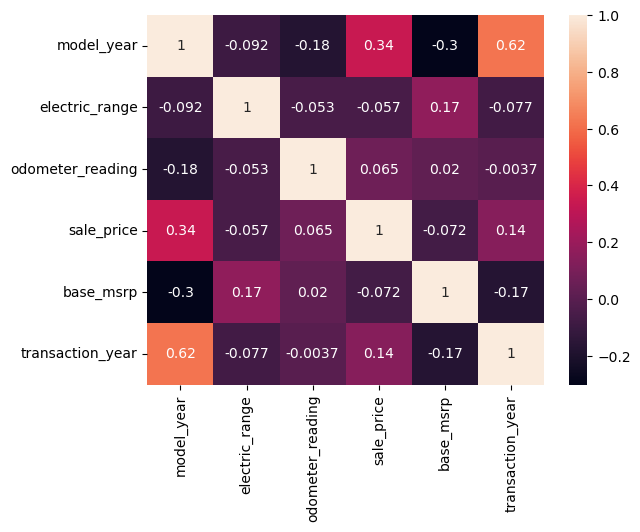

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame

# Compute the correlation matrix
corr_matrix = ev_reg_df.corr()

# Visualize the correlation matrix as a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True)

# Save the plot as an image with a higher dpi and larger bbox_inches
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/reg_corr.png', dpi=300, bbox_inches='tight')

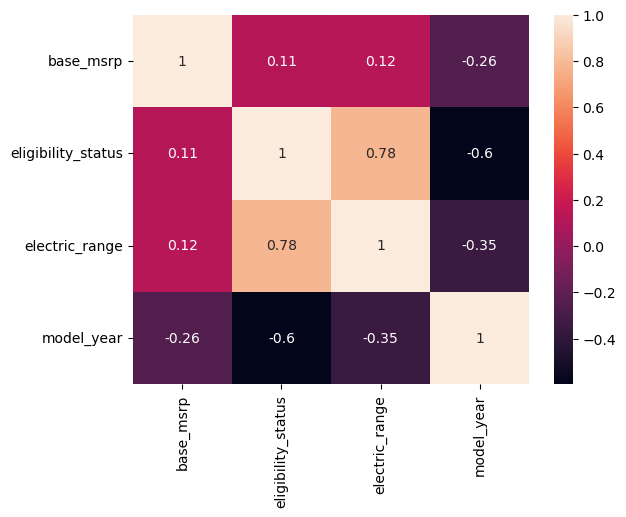

In [15]:
import pandas as pd
import seaborn as sns

# Load the data into a pandas DataFrame

# Compute the correlation matrix
corr_matrix = ev_pop_df.corr()

# Visualize the correlation matrix as a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True)

# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/pop_corr.png', dpi=300, bbox_inches='tight')

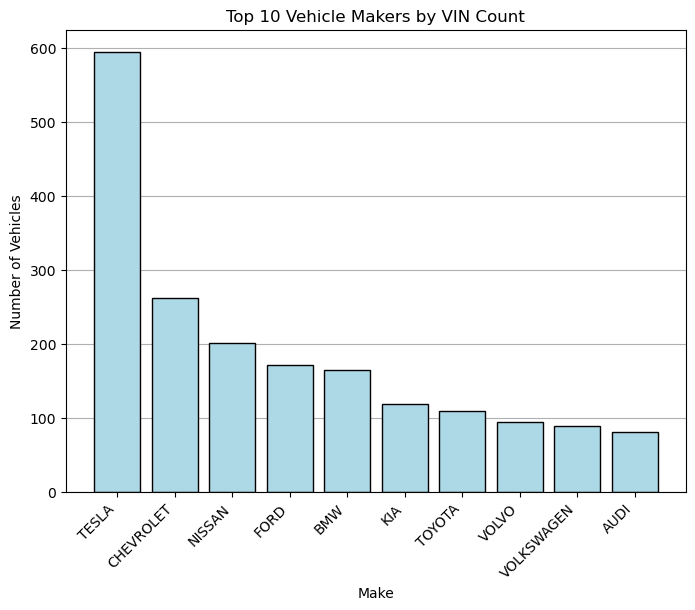

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by 'make' and count the number of unique 'vin' values for each group
grouped = ev_pop_df.groupby('make')['vin'].nunique()

# Select the top 10 groups by sorting the values in descending order and taking the first 10 rows
top_groups = grouped.sort_values(ascending=False).head(10)

# Create a bar chart of the top 10 groups with increased spacing and red bars
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(top_groups.index, top_groups.values, width=0.8, color='lightblue', edgecolor='black')

# Add labels and title
ax.set_xlabel('Make')
ax.set_ylabel('Number of Vehicles')
ax.set_title('Top 10 Vehicle Makers by VIN Count')

# Increase spacing between bars and add grid lines
ax.set_xticks(range(len(top_groups)))
ax.set_xticklabels(top_groups.index, rotation=45, ha='right')
ax.set_axisbelow(True)
ax.grid(axis='y')

# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/pop_top10.png', dpi=300, bbox_inches='tight')
# Show the chart
plt.show()



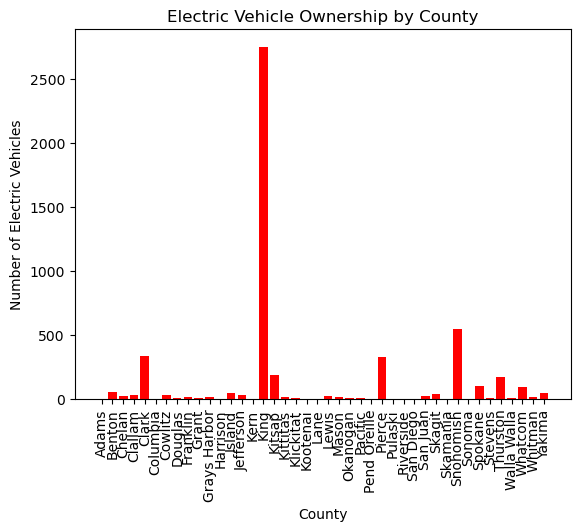

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# group the data by county and count the number of electric vehicles in each county
ev_counts = ev_pop_df.groupby('county')['vin'].count().reset_index(name='count')

# create a bar plot of electric vehicle ownership by county
plt.bar(ev_counts['county'], ev_counts['count'],color='red')

# set the title and axes labels
plt.title('Electric Vehicle Ownership by County')
plt.xlabel('County')
plt.ylabel('Number of Electric Vehicles')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/pop_ev_county.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()




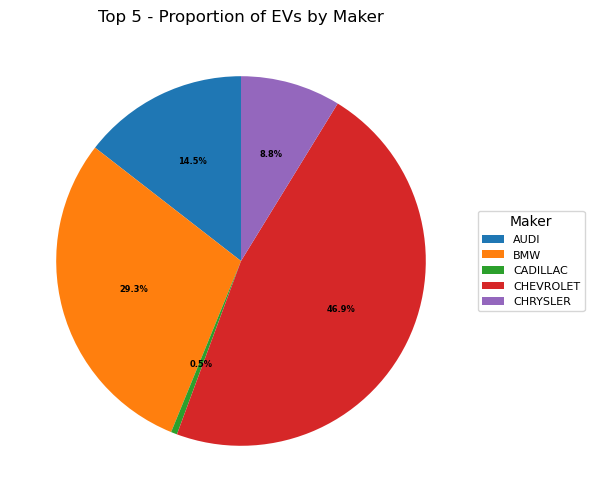

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by 'make' and count the number of unique 'vin' values for each group
grouped = ev_pop_df.groupby('make')['vin'].nunique().head(5)

# Create a pie chart of the proportion of vehicles for each maker
fig, ax = plt.subplots(figsize=(8, 6))
wedges, labels, autopct = ax.pie(grouped.values, labels=None, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})

# Add title
ax.set_title('Top 5 - Proportion of EVs by Maker')

# Adjust text properties
plt.setp(autopct, size=6, weight='bold')

# Add legend
ax.legend(wedges, grouped.index, title='Maker', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)

# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/pop_ev_makers.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()



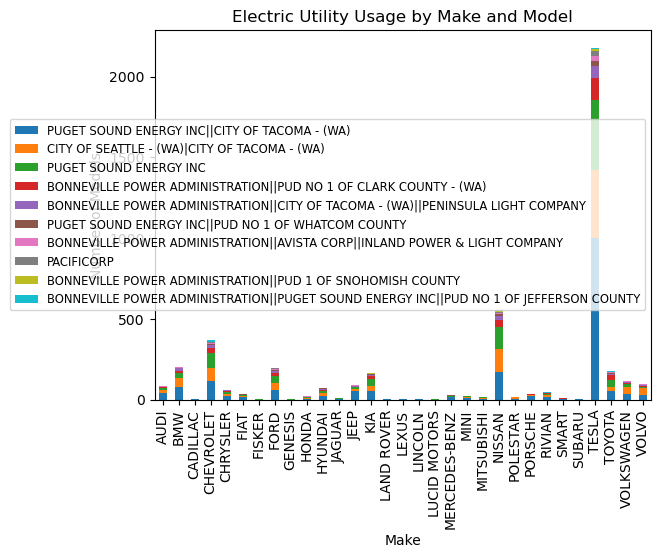

In [19]:
#How does the electric_utility used by vehicles vary across different make and model combinations? 
import pandas as pd
import matplotlib.pyplot as plt

# create a DataFrame
data = ev_pop_df
df = pd.DataFrame(data)

# group the data by make and electric_utility and count the number of models
grouped = df.groupby(['make', 'electric_utility']).size().unstack()

# sort the values by the sum of the columns and keep only the top 10 electric utilities
grouped = grouped.loc[:, grouped.sum().sort_values(ascending=False).head(10).index]

# create a stacked bar chart
grouped.plot(kind='bar', stacked=True)

# set the title and axis labels
plt.title('Electric Utility Usage by Make and Model')
plt.xlabel('Make')
plt.ylabel('Number of Models')
# set the font size of the legends
plt.legend(fontsize='small')

# show the plot
plt.show()

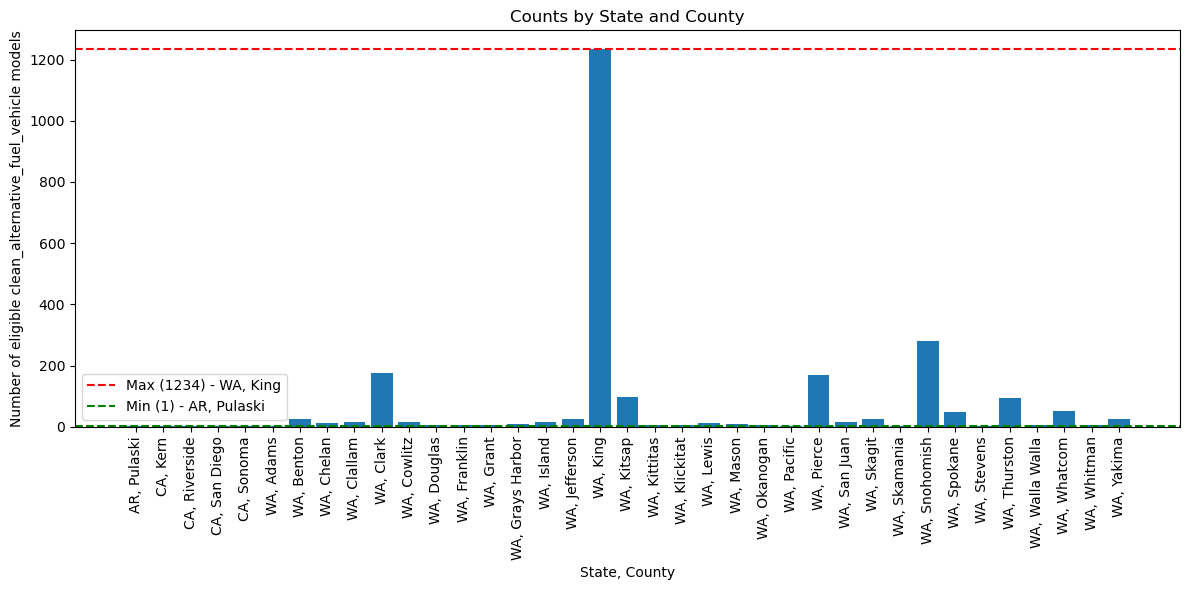

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = ev_pop_df

# Group the data by state and county, and calculate the total count of eligible clean_alternative_fuel_vehicle models in each group
counts = df[df['eligibility_status'] == 1].groupby(['state', 'county'])['vin'].count().reset_index()

# Find the state and county with the highest and lowest number of eligible clean_alternative_fuel_vehicle models
max_count = counts.loc[counts['vin'].idxmax()]
min_count = counts.loc[counts['vin'].idxmin()]

# Create a bar chart of the counts by state and county
plt.figure(figsize=(12,6))
plt.bar(counts.index, counts['vin'])
plt.xticks(counts.index, counts['state'] + ', ' + counts['county'], rotation=90)
plt.xlabel('State, County')
plt.ylabel('Number of eligible clean_alternative_fuel_vehicle models')
plt.title('Counts by State and County')
plt.axhline(y=max_count['vin'], color='red', linestyle='--', label=f"Max ({max_count['vin']}) - {max_count['state']}, {max_count['county']}")
plt.axhline(y=min_count['vin'], color='green', linestyle='--', label=f"Min ({min_count['vin']}) - {min_count['state']}, {min_count['county']}")
plt.legend()
plt.tight_layout()
# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/pop_CAFVE_1.png', dpi=300, bbox_inches='tight')


plt.show()



In [21]:
import pandas as pd
from tabulate import tabulate

# Group the DataFrame by county and count the VINs
county_vin = ev_pop_df.groupby('county')['vin'].count()

# Create a new DataFrame with the county names and total EVs
county_ev_df = pd.DataFrame({'County': county_vin.index, 'Total EVs': county_vin.values})

# Sort the DataFrame in descending order by Total EVs
county_ev_df = county_ev_df.sort_values(by='Total EVs', ascending=False)

# Display the DataFrame as a table
table = tabulate(county_ev_df, headers='keys', tablefmt='psql', showindex=False)
print(table)

+--------------+-------------+
| County       |   Total EVs |
|--------------+-------------|
| King         |        2746 |
| Snohomish    |         547 |
| Clark        |         336 |
| Pierce       |         327 |
| Kitsap       |         186 |
| Thurston     |         170 |
| Spokane      |         100 |
| Whatcom      |          97 |
| Benton       |          51 |
| Yakima       |          50 |
| Island       |          45 |
| Skagit       |          40 |
| Jefferson    |          33 |
| Cowlitz      |          31 |
| Clallam      |          28 |
| San Juan     |          27 |
| Chelan       |          22 |
| Lewis        |          21 |
| Mason        |          16 |
| Grays Harbor |          15 |
| Franklin     |          14 |
| Kittitas     |          13 |
| Whitman      |          12 |
| Klickitat    |          10 |
| Walla Walla  |           9 |
| Grant        |           9 |
| Okanogan     |           8 |
| Douglas      |           8 |
| Stevens      |           5 |
| Pacifi

In [22]:
grouped_reg = ev_reg_df.groupby('make').count()
grouped_reg

,vin,clean_alternative_fuel_vehicle_type,dol_vehicle_id,model_year,model,vehicle_primary_use,electric_range,odometer_reading,odometer_code,new_or_used_vehicle,...,meets_2019_hb_2042_electric_range_requirement,meets_2019_hb_2042_sale_date_requirement,meets_2019_hb_2042_sale_price_value_requirement,hb_2042_battery_range_requirement,hb_2042_purchase_date_requirement,hb_2042_sale_price_value_requirement,electric_vehicle_fee_paid,transportation_electrification_fee_paid,hybrid_vehicle_electrification_fee_paid,electric_utility
make,,,,,,,,,,,,,,,,,,,,,
AUDI,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
BMW,239,239,239,239,239,239,239,239,239,239,...,239,239,239,239,239,239,239,220,239,239
CADILLAC,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
CHEVROLET,510,510,510,510,510,510,510,510,510,510,...,510,510,510,510,510,510,510,404,510,510
CHRYSLER,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
FIAT,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
FISKER,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,3,9,9
FORD,257,257,257,257,257,257,257,257,257,257,...,257,257,257,257,257,257,257,195,257,257
HONDA,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


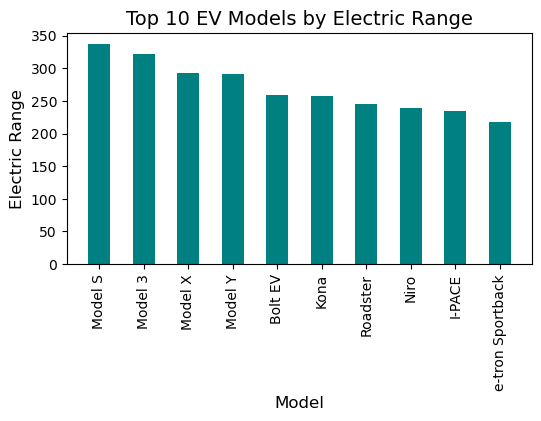

<Figure size 640x480 with 0 Axes>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by make and model, and get the max electric range
max_range_df = ev_reg_df.groupby(['make', 'model'])['electric_range'].max().reset_index()

# Sort by descending range
max_range_df = max_range_df.sort_values(by='electric_range', ascending=False)

# Get the top 10 models with the highest range
top_models = max_range_df.head(10)
# Set the figure size to 10 inches by 6 inches
fig, ax = plt.subplots(figsize=(6, 3))

# Create a bar chart of the top 10 models with the highest range
plt.bar(top_models['model'], top_models['electric_range'], width=0.5, color='teal')

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Electric Range', fontsize=12)
plt.title('Top 10 EV Models by Electric Range', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(range(0, 400, 50))
# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/reg_ev_range.png', dpi=300, bbox_inches='tight')

fig = plt.figure(facecolor='lightgray')


# Show the chart
plt.show()




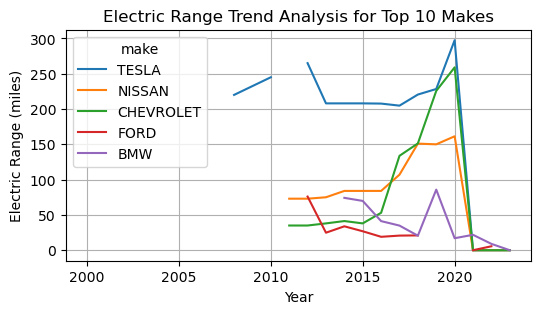

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the top 10 makes by number of models
top_makes = ev_reg_df['make'].value_counts().head(5).index.tolist()

# Group the DataFrame by make and year, and calculate the average electric range
make_year_range = ev_reg_df.groupby(['make', 'model_year'])['electric_range'].mean().unstack(level=0)

# Plot the trend lines for each make
ax = make_year_range[top_makes].plot(figsize=(6, 3), grid=True)

# Set the x and y labels
ax.set_xlabel('Year')
ax.set_ylabel('Electric Range (miles)')

# Set the title
ax.set_title('Electric Range Trend Analysis for Top 10 Makes')

# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/reg_ev_range_trend.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [25]:
ev_reg_df['new_or_used_vehicle']

0       Used
1       Used
2       Used
3        New
4        New
        ... 
4995    Used
4996    Used
4997    Used
4998     New
4999    Used
Name: new_or_used_vehicle, Length: 5000, dtype: object

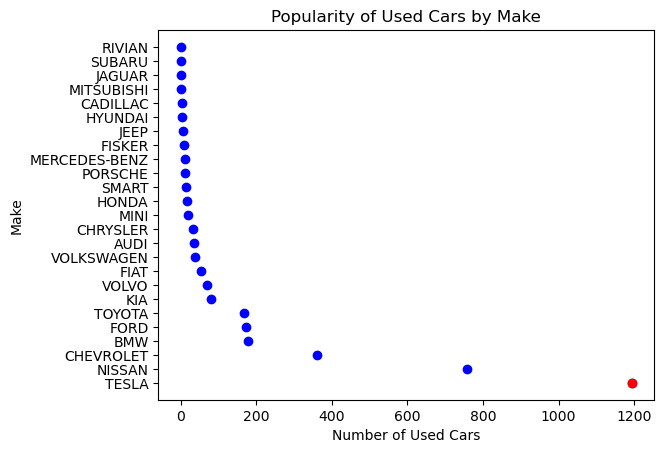

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the used cars
used_cars = ev_reg_df[ev_reg_df['new_or_used_vehicle'] == 'Used']

# Group the used cars by make and count the number of models
used_car_counts = used_cars['make'].value_counts()


# Create a scatter plot of the used car counts
plt.scatter(used_car_counts.values, used_car_counts.index, color='blue')

# Highlight the most popular make
most_popular_make = used_car_counts.idxmax()
plt.scatter(used_car_counts[most_popular_make], most_popular_make, color='red')

# Add labels and title
plt.xlabel('Number of Used Cars')
plt.ylabel('Make')
plt.title('Popularity of Used Cars by Make')

# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/reg_ev_used.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()



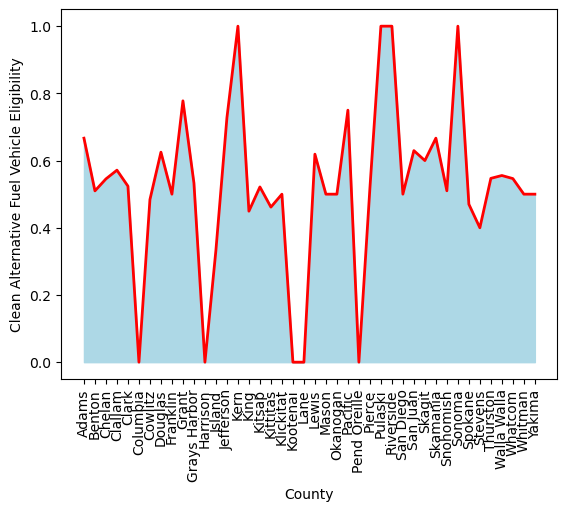

In [27]:
import matplotlib.pyplot as plt

# group the data by county and calculate the mean eligibility status
df = ev_pop_df.groupby('county')['eligibility_status'].mean()

# create a line chart of the trend with color customization
plt.plot(df.index, df.values, color='red', linewidth=2)
plt.fill_between(df.index, df.values, color='lightblue')



# set axis labels
plt.xlabel('County')
plt.ylabel('Clean Alternative Fuel Vehicle Eligibility')

# rotate x-axis labels to make them easier to read
plt.xticks(rotation=90)

# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/pop_CAFVE.png', dpi=300, bbox_inches='tight')

# display the plot
plt.show()


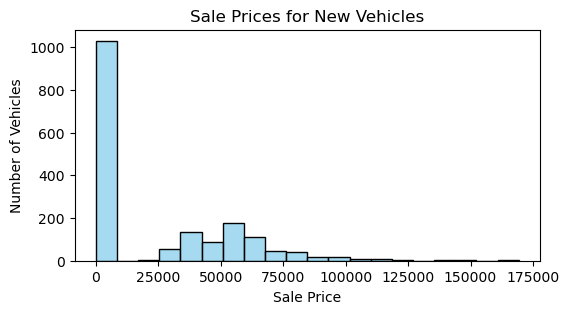

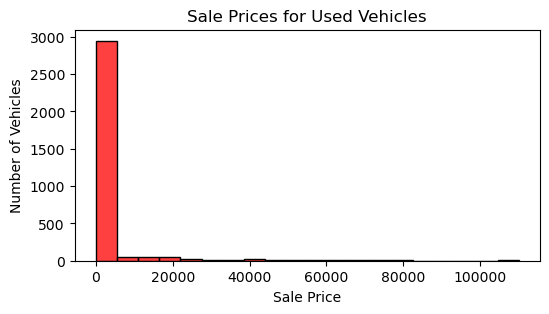

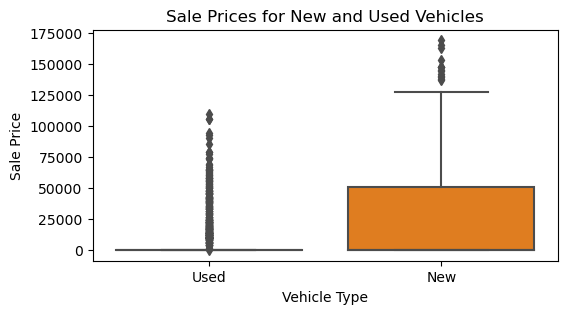

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a new dataframe for new vehicles
new_df = ev_reg_df[ev_reg_df['new_or_used_vehicle'] == 'New']


# create a new dataframe for used vehicles
used_df = ev_reg_df[ev_reg_df['new_or_used_vehicle'] == 'Used']

# set the figure size
plt.figure(figsize=(6, 3))

# create a histogram of sale prices for new vehicles
sns.histplot(new_df['sale_price'], color='skyblue', bins=20)
plt.title('Sale Prices for New Vehicles')
plt.xlabel('Sale Price')
plt.ylabel('Number of Vehicles')
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/reg_sales_1.png', dpi=300, bbox_inches='tight')
plt.show()

# set the figure size
plt.figure(figsize=(6, 3))
# create a histogram of sale prices for used vehicles
sns.histplot(used_df['sale_price'], color='red', bins=20)
plt.title('Sale Prices for Used Vehicles')
plt.xlabel('Sale Price')
plt.ylabel('Number of Vehicles')
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/reg_sales_2.png', dpi=300, bbox_inches='tight')
plt.show()
# set the figure size
plt.figure(figsize=(6, 3))

# create a box plot of sale prices for new and used vehicles
sns.boxplot(x='new_or_used_vehicle', y='sale_price', data=ev_reg_df, palette='bright')
plt.title('Sale Prices for New and Used Vehicles')
plt.xlabel('Vehicle Type')
plt.ylabel('Sale Price')
# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/reg_sales_3.png', dpi=300, bbox_inches='tight')
plt.show()




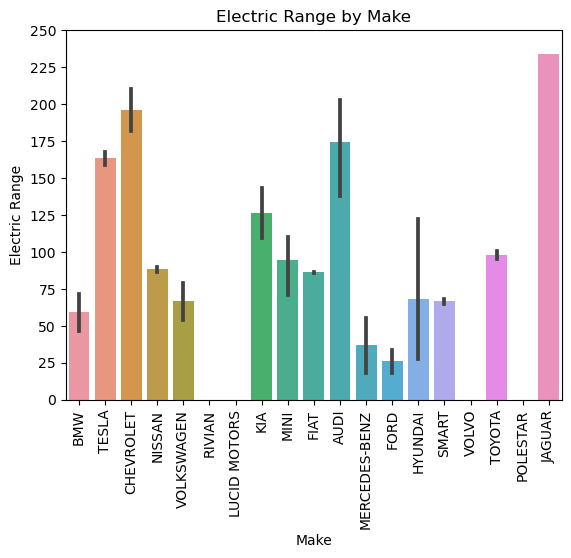

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a new dataframe for electric vehicles
ev_df = ev_reg_df[ev_reg_df['clean_alternative_fuel_vehicle_type'] == 'Battery Electric Vehicle (BEV)']

# create a bar chart of electric range by make and vehicle class
sns.barplot(x='make', y='electric_range', data=ev_df)
plt.title('Electric Range by Make')
plt.xlabel('Make')
plt.ylabel('Electric Range')
plt.xticks(rotation=90)
plt.yticks(range(0, 275, 25))
# Save the plot as an image
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/reg_rangebymake.png', dpi=300, bbox_inches='tight')

plt.show()


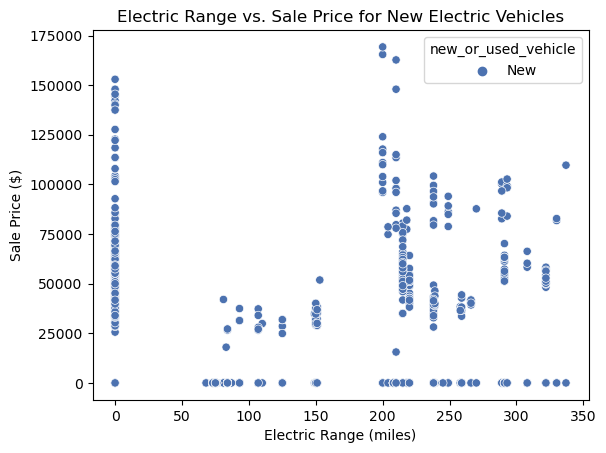

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a new dataframe for new electric vehicles
new_ev_df = ev_reg_df[(ev_reg_df['clean_alternative_fuel_vehicle_type'] == 'Battery Electric Vehicle (BEV)') &
                      (ev_reg_df['new_or_used_vehicle'] == 'New')]

# create the scatter plot of electric range vs. sale price
sns.scatterplot(x='electric_range', y='sale_price', hue='new_or_used_vehicle', data=new_ev_df, palette='deep')
plt.title('Electric Range vs. Sale Price for New Electric Vehicles')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Sale Price ($)')
plt.savefig('C:/Users/Admin/Desktop/DA_Project/DAP/airflow/chart/reg_range_vs_sales.png', dpi=300, bbox_inches='tight')
plt.show()
